<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/mushrooms.csv')

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
X=df.drop('class',axis=1)

In [7]:
y=df['class']

In [8]:
X=pd.get_dummies(X,drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid={'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],
            'max_depth':[3,4,5]}

In [14]:
gb_model=GradientBoostingClassifier()

In [15]:
grid=GridSearchCV(gb_model,param_grid)

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [19]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [21]:
pred=grid.predict(X_test)

In [22]:
pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
grid.best_estimator_

GradientBoostingClassifier()

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [26]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.12759294e-16, 0.00000000e+00, 0.00000000e+00,
       9.86902298e-17, 1.04524302e-03, 0.00000000e+00, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 1.14142879e-17, 0.00000000e+00,
       6.17860858e-17, 0.00000000e+00, 0.00000000e+00, 1.01895537e-08,
       2.31056241e-03, 5.30956143e-02, 1.84253604e-04, 1.75534955e-02,
       1.82499853e-02, 1.35753620e-04, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.09449796e-02, 0.00000000e+00, 2.22738083e-16, 0.00000000e+00,
       1.17718238e-17, 0.00000000e+00, 0.00000000e+00, 1.12278189e-17,
       5.98903979e-17, 0.00000000e+00, 2.33628605e-18, 1.00639725e-18,
       2.92091629e-04, 4.94958266e-04, 1.36143422e-01, 7.71855052e-03,
       2.02878240e-02, 3.94890079e-03, 7.82751635e-06, 4.95063766e-06,
       0.00000000e+00, 6.73578280e-07, 4.90365385e-02, 2.19976004e-04,
       0.00000000e+00, 0.00000000e+00, 5.50350499e-04, 0.00000000e+00,
      

In [27]:
feat_imp=grid.best_estimator_.feature_importances_

In [28]:
impo_feat=pd.DataFrame(index=X.columns,data=feat_imp,columns=['importance'])

In [31]:
impo_feat=impo_feat[impo_feat['importance']>0.0005]

In [32]:
impo_feat

,importance
cap-surface_g,0.001045
cap-color_y,0.002311
bruises_t,0.053096
odor_f,0.017553
odor_l,0.018250
odor_n,0.614744
odor_p,0.000921
gill-spacing_w,0.012509
gill-size_n,0.010945
stalk-root_c,0.136143


In [34]:
impo_feat=impo_feat.sort_values('importance')

<ipython-input-37-1f0c9046ad95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impo_feat,x=impo_feat.index,


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'stalk-color-above-ring_n'),
  Text(1, 0, 'stalk-color-above-ring_w'),
  Text(2, 0, 'odor_p'),
  Text(3, 0, 'cap-surface_g'),
  Text(4, 0, 'population_c'),
  Text(5, 0, 'cap-color_y'),
  Text(6, 0, 'stalk-color-below-ring_y'),
  Text(7, 0, 'spore-print-color_h'),
  Text(8, 0, 'stalk-surface-above-ring_k'),
  Text(9, 0, 'spore-print-color_u'),
  Text(10, 0, 'ring-type_p'),
  Text(11, 0, 'stalk-root_e'),
  Text(12, 0, 'gill-size_n'),
  Text(13, 0, 'gill-spacing_w'),
  Text(14, 0, 'odor_f'),
  Text(15, 0, 'odor_l'),
  Text(16, 0, 'stalk-root_r'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'stalk-surface-below-ring_y'),
  Text(19, 0, 'bruises_t'),
  Text(20, 0, 'stalk-root_c'),
  Text(21, 0, 'odor_n')])

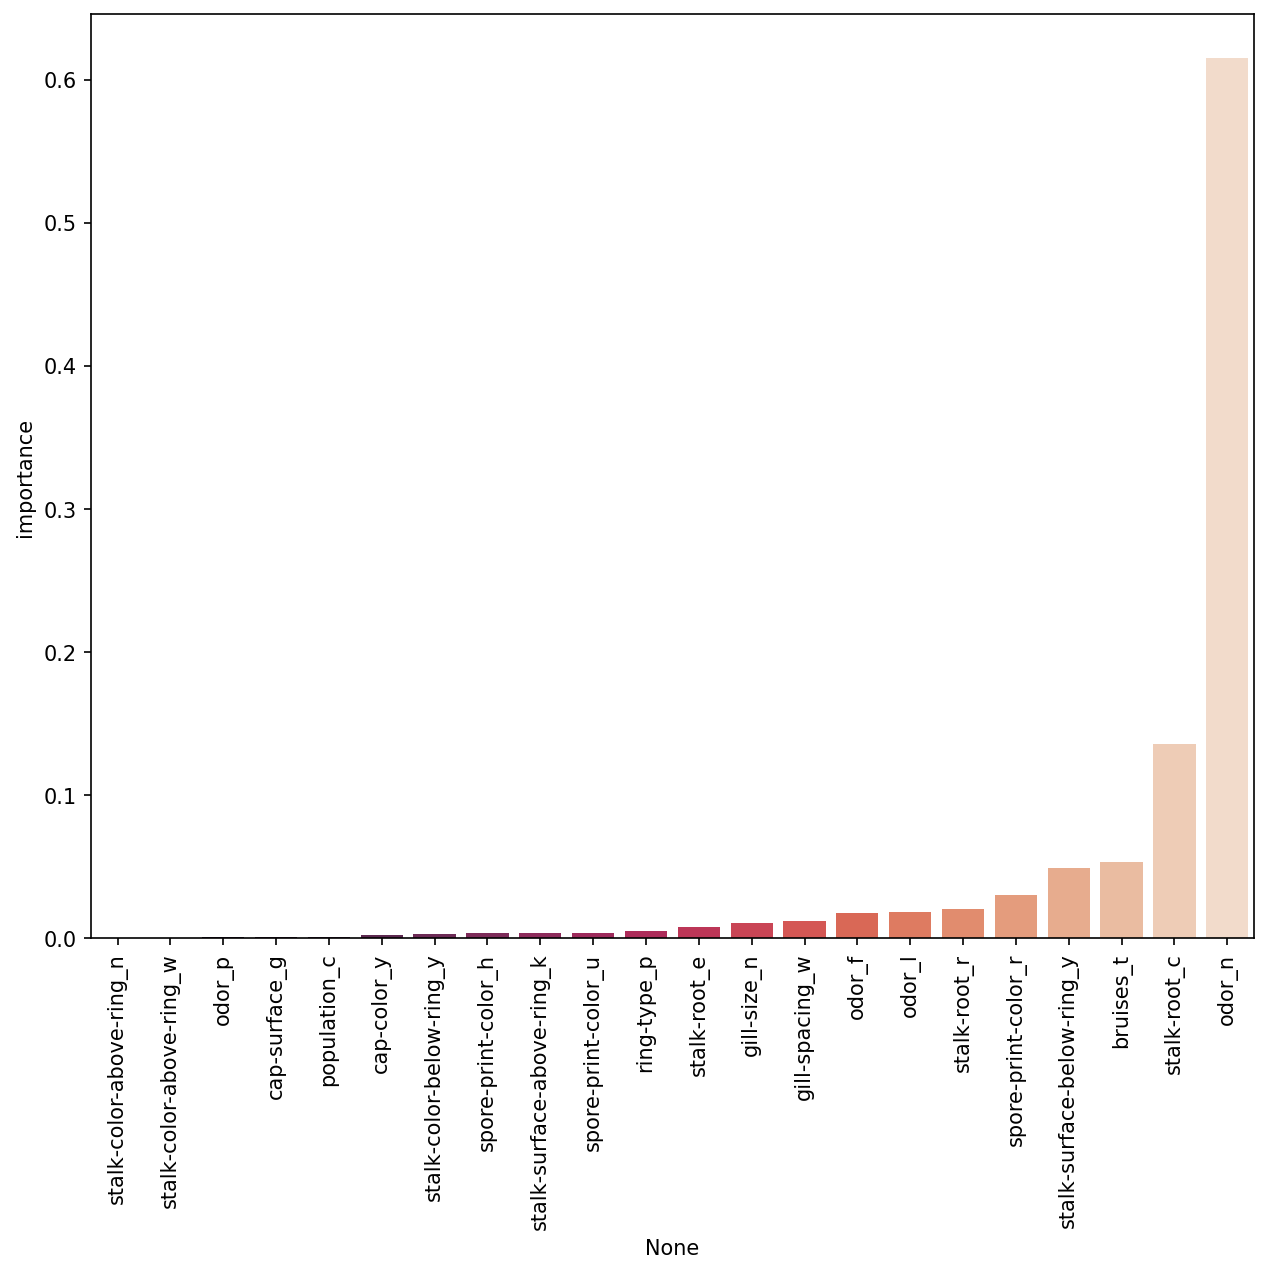

In [37]:
plt.figure(figsize=(10,8),dpi=150)

sns.barplot(data=impo_feat,x=impo_feat.index,
            y='importance',palette='rocket')
plt.xticks(rotation=90)